<h4>Install prophet + plotly for interactive plotting (interactive plots are laggy)

In [2]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 4.3 MB/s eta 0:00:04
   - -------------------------------------- 0.4/13.3 MB 4.9 MB/s eta 0:00:03
   - -------------------------------------- 0.6/13.3 MB 4.6 MB/s eta 0:00:03
   -- ------------------------------------- 0.9/13.3 MB 5.4 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/13.3 MB 5.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/13.3 MB 7.0 MB/s eta 0:00:02
   ------ --------------------------------- 2.3/13.3 MB 7.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.9/13.3 MB 8.3 MB/s eta 0:00:02
   ---------- ----------------------------- 3.5/13.3 MB 8.8 MB/s eta 0:00:02
   ----------- ---------------------------- 4.0/13.3 MB 9.4 MB/s eta 0:00:01
   ------------- -------------------------- 4.5/13.3 MB 9.5 MB/s eta 0:00:01
   -------------- ------------------------- 5.0/13.3 MB 10.0 MB/s eta 0:00:01
   --

In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from sklearn.metrics import mean_absolute_percentage_error

f2021 = "../IT-NO_2021_hourly.csv"
f2022 = "../IT-NO_2022_hourly.csv"
f2023 = "../IT-NO_2023_hourly.csv"

dataset1 = pd.read_csv(f2021)
dataset2 = pd.read_csv(f2022)
dataset3 = pd.read_csv(f2023)

In [4]:
dataset3

,Datetime (UTC),Country,Zone Name,Zone Id,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,Data Source,Data Estimated,Data Estimation Method
0,2023-01-01 00:00:00,Italy,North Italy,IT-NO,320.84,405.97,37.78,27.32,entsoe.eu,False,NaN
1,2023-01-01 01:00:00,Italy,North Italy,IT-NO,316.96,400.55,39.28,28.04,entsoe.eu,False,NaN
2,2023-01-01 02:00:00,Italy,North Italy,IT-NO,318.56,402.02,39.26,27.20,entsoe.eu,False,NaN
3,2023-01-01 03:00:00,Italy,North Italy,IT-NO,308.63,390.06,41.55,28.54,entsoe.eu,False,NaN
4,2023-01-01 04:00:00,Italy,North Italy,IT-NO,310.02,392.05,41.19,28.56,entsoe.eu,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31 19:00:00,Italy,North Italy,IT-NO,260.51,333.72,46.38,36.24,entsoe.eu,False,NaN
8756,2023-12-31 20:00:00,Italy,North Italy,IT-NO,265.88,342.93,43.68,32.08,entsoe.eu,False,NaN
8757,2023-12-31 21:00:00,Italy,North Italy,IT-NO,250.60,324.02,47.82,32.64,entsoe.eu,False,NaN
8758,2023-12-31 22:00:00,Italy,North Italy,IT-NO,260.48,337.50,44.98,31.23,entsoe.eu,False,NaN


Some useful functions to plot and print graphs:

                        LCA
timestamp                  
2021-01-01 00:00:00  389.74
2021-01-01 01:00:00  387.76
2021-01-01 02:00:00  377.86
2021-01-01 03:00:00  380.36
2021-01-01 04:00:00  394.66


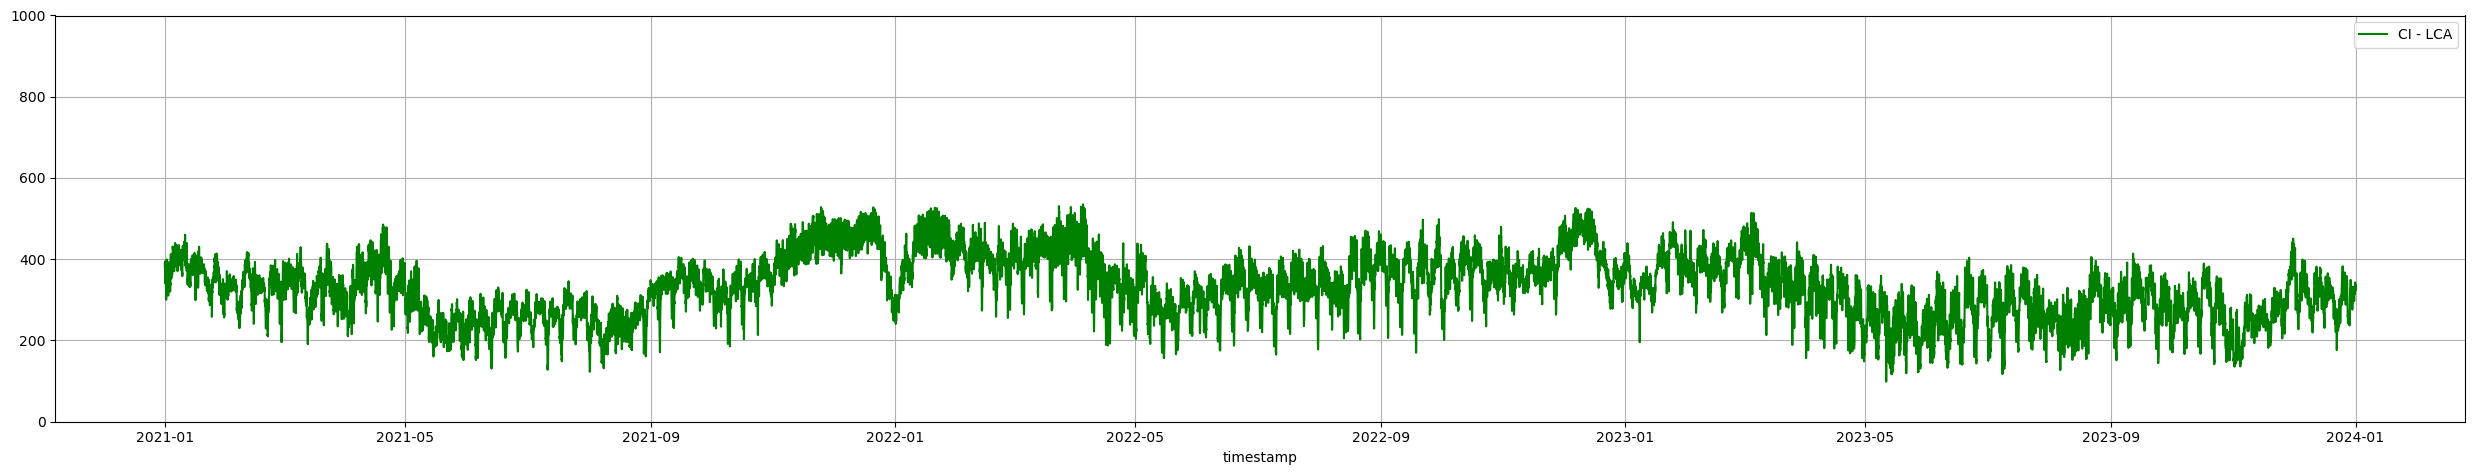

In [5]:
# Data concatenation of carbon intensity:
dataset_CI = pd.concat([dataset1, dataset2, dataset3], axis=0)
dataset_CI['Datetime (UTC)'] = pd.to_datetime(dataset_CI['Datetime (UTC)'])
dataset_CI.rename(columns={'Datetime (UTC)': 'timestamp'}, inplace=True) # Column renaming
dataset_CI.rename(columns={'Carbon Intensity gCO₂eq/kWh (LCA)': 'LCA'}, inplace=True) # Column renaming
dataset_CI.set_index('timestamp', inplace=True)
dataset_CI.drop(columns=['Country', 'Zone Name', 'Zone Id', 'Data Source', 'Data Estimated', 'Data Estimation Method', 'Low Carbon Percentage', 'Renewable Percentage', 'Carbon Intensity gCO₂eq/kWh (direct)'], inplace=True)
print(dataset_CI.head())

# Plotting and comparison od the different CI values
x = dataset_CI.index
y = dataset_CI['LCA']

# Create subplots with shared X-axis
fig, ax1 = plt.subplots(1, 1, figsize=(25, 5), sharex=True)

# Plot data on each subplot
ax1.grid(True)
ax1.plot(x, y, 'g', label='CI - LCA')
ax1.set_ylim(0, 1000)
ax1.set_xlabel('timestamp')

# Add legends
ax1.legend()
plt.rc("font", weight="bold", size=15)
plt.tight_layout()
# Show the plot
plt.show()

Testing prophet on LCA+direct datapoints. documentation: https://facebook.github.io/prophet/docs/quick_start.html#python-api
 

Preparing the dataframe as required by the prophet documentation:

In [8]:
dataset_CI_fix = dataset_CI.reset_index()
dataset_CI_fix.rename(columns={'timestamp':'ds', 'LCA':'y' }, inplace=True)
dataset_CI_fix.tail()

,ds,y
26275,2023-12-31 19:00:00,333.72
26276,2023-12-31 20:00:00,342.93
26277,2023-12-31 21:00:00,324.02
26278,2023-12-31 22:00:00,337.50
26279,2023-12-31 23:00:00,323.51


### Training using the different time periods & length + parameters tuning:


In [9]:
dataset_30m = dataset_CI_fix[(dataset_CI_fix['ds'] < '2023-07')] # 2.5 years of data = 30 months
dataset_28m = dataset_30m[(dataset_30m['ds'] > '2021-03')]
dataset_26m = dataset_28m[(dataset_28m['ds'] > '2021-05')]
dataset_24m = dataset_26m[(dataset_26m['ds'] > '2021-07')]
dataset_22m = dataset_24m[(dataset_24m['ds'] > '2021-09')]
dataset_20m = dataset_22m[(dataset_22m['ds'] > '2021-11')]
dataset_18m = dataset_20m[(dataset_20m['ds'] > '2022-01')]
dataset_16m = dataset_18m[(dataset_18m['ds'] > '2022-03')]
dataset_14m = dataset_16m[(dataset_16m['ds'] > '2022-05')]
dataset_12m = dataset_14m[(dataset_14m['ds'] > '2022-07')] 
dataset_10m = dataset_12m[(dataset_12m['ds'] > '2022-09')] 

dataset_30m.name = "30 months"
dataset_28m.name = "28 months"
dataset_26m.name = "26 months" 
dataset_24m.name = "24 months"
dataset_22m.name = "22 months"
dataset_20m.name = "20 months"
dataset_18m.name = "18 months"
dataset_16m.name = "16 months"
dataset_14m.name = "14 months"
dataset_12m.name = "12 months"
dataset_10m.name = "10 months"

According to prophet documentation, https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning 
Parameters that can be tuned:

    changepoint_prior_scale: This is probably the most impactful parameter. It determines the flexibility of the trend, and in particular how much the trend changes at the trend changepoints. As described in this documentation, if it is too small, the trend will be underfit and variance that should have been modeled with trend changes will instead end up being handled with the noise term. If it is too large, the trend will overfit and in the most extreme case you can end up with the trend capturing yearly seasonality. The default of 0.05 works for many time series, but this could be tuned; a range of [0.001, 0.5] would likely be about right. Parameters like this (regularization penalties; this is effectively a lasso penalty) are often tuned on a log scale.

    seasonality_prior_scale: This parameter controls the flexibility of the seasonality. Similarly, a large value allows the seasonality to fit large fluctuations, a small value shrinks the magnitude of the seasonality. The default is 10., which applies basically no regularization. That is because we very rarely see overfitting here (there’s inherent regularization with the fact that it is being modeled with a truncated Fourier series, so it’s essentially low-pass filtered). A reasonable range for tuning it would probably be [0.01, 10]; when set to 0.01 you should find that the magnitude of seasonality is forced to be very small. This likely also makes sense on a log scale, since it is effectively an L2 penalty like in ridge regression.

Hence, <b>using them to tune the model and finding better performance, along with using different training length and prediction length to find the best performing parameters</b>

In [10]:
datasets = [dataset_30m, dataset_28m, dataset_26m, dataset_24m, dataset_22m, dataset_20m, dataset_18m, dataset_16m, dataset_14m, dataset_12m]

errordf = pd.DataFrame(columns=['1w', '2w', '4w', '1m', '2m', '6m']) # recording all error % value here to later find the best parameters

# paramteter grid, accrding to the documaentation:
param_grid = {  
    'yearly_seasonality' : [True], 
    'weekly_seasonality' : [True], 
    'daily_seasonality' : [True],
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

for dataset in datasets:
     for params in all_params: 
          m = Prophet(**params)
          m.fit(dataset)
          future = m.make_future_dataframe(periods=184) # Half a year of prediction
          forecast = m.predict(future)

          real_val = dataset_CI_fix[(dataset_CI_fix['ds'] > '2023-07')]
          real_val = real_val[(real_val['ds'].dt.hour == 23)]
          real_val = real_val.reset_index()

          pred_val = forecast[(forecast['ds'] > '2023-07')]
          pred_val = pred_val['yhat'].reset_index()

          dataset_zoom = pd.concat([real_val, pred_val], axis = 1)
          dataset_zoom.drop(columns=['index'], inplace = True)
          dataset_zoom.columns = ['Timestamp', 'Real Values', 'Prediction']
          dataset_zoom = dataset_zoom.set_index('Timestamp')
          dataset_zoom

          dataset_zoom['percerr_graph'] = (abs(dataset_zoom['Prediction']-dataset_zoom['Real Values'])/dataset_zoom['Real Values'])*100
          errordf.loc[f"{dataset.name} + {params}"] = [100*mean_absolute_percentage_error(dataset_zoom[0:7]['Real Values'], dataset_zoom[0:7]['Prediction']), 100*mean_absolute_percentage_error(dataset_zoom[0:14]['Real Values'], dataset_zoom[0:14]['Prediction']), 100*mean_absolute_percentage_error(dataset_zoom[0:21]['Real Values'], dataset_zoom[0:21]['Prediction']), 100*mean_absolute_percentage_error(dataset_zoom[0:30]['Real Values'], dataset_zoom[0:30]['Prediction']), 100*mean_absolute_percentage_error(dataset_zoom[0:60]['Real Values'], dataset_zoom[0:60]['Prediction']), 100*mean_absolute_percentage_error(dataset_zoom['Real Values'], dataset_zoom['Prediction'])] 

          del(real_val)
          del(pred_val)
          del(dataset_zoom)

          # # ERROR print: uncomment to print:
          # print(f"\nDATASET: {dataset.name}; Error calculation:\
          #      \n1 WEEK:\
          #      %Mean.Abs.Perc.Err: {100*mean_absolute_percentage_error(dataset_zoom[0:7]['Real Values'], dataset_zoom[0:7]['Prediction']):.2f}                \
          #      \n2 WEEKS:\
          #      %Mean.Abs.Perc.Err: {100*mean_absolute_percentage_error(dataset_zoom[0:14]['Real Values'], dataset_zoom[0:14]['Prediction']):.2f}                    \
          #      \n1 MONTH:\
          #      %Mean.Abs.Perc.Err: {100*mean_absolute_percentage_error(dataset_zoom[0:30]['Real Values'], dataset_zoom[0:30]['Prediction']):.2f}                         \
          #      \n2 MONTHS:\
          #      %Mean.Abs.Perc.Err: {100*mean_absolute_percentage_error(dataset_zoom[0:60]['Real Values'], dataset_zoom[0:60]['Prediction']):.2f}                   \
          #      \n6 MONTHS:\
          #      %Mean.Abs.Perc.Err: {100*mean_absolute_percentage_error(dataset_zoom['Real Values'], dataset_zoom['Prediction']):.2f}")


errordf

18:06:19 - cmdstanpy - INFO - Chain [1] start processing
18:06:22 - cmdstanpy - INFO - Chain [1] done processing
18:06:28 - cmdstanpy - INFO - Chain [1] start processing
18:06:31 - cmdstanpy - INFO - Chain [1] done processing
18:06:37 - cmdstanpy - INFO - Chain [1] start processing
18:06:41 - cmdstanpy - INFO - Chain [1] done processing
18:06:46 - cmdstanpy - INFO - Chain [1] start processing
18:06:50 - cmdstanpy - INFO - Chain [1] done processing
18:06:56 - cmdstanpy - INFO - Chain [1] start processing
18:07:05 - cmdstanpy - INFO - Chain [1] done processing
18:07:10 - cmdstanpy - INFO - Chain [1] start processing
18:07:19 - cmdstanpy - INFO - Chain [1] done processing
18:07:29 - cmdstanpy - INFO - Chain [1] start processing
18:07:42 - cmdstanpy - INFO - Chain [1] done processing
18:07:48 - cmdstanpy - INFO - Chain [1] start processing
18:07:59 - cmdstanpy - INFO - Chain [1] done processing
18:08:04 - cmdstanpy - INFO - Chain [1] start processing
18:08:29 - cmdstanpy - INFO - Chain [1]

,1w,2w,4w,1m,2m,6m
"30 months + {'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}",12.992292,13.070105,13.720252,12.342333,12.236936,19.823181
"30 months + {'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1}",12.974330,13.076636,13.731812,12.362269,12.270542,19.899225
"30 months + {'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0}",12.924036,13.119597,13.804163,12.462891,12.399880,19.811642
"30 months + {'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0}",12.930746,13.192926,13.899360,12.578877,12.533637,19.746469
"30 months + {'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}",16.335222,12.776649,11.869224,11.176807,10.591081,25.013578
...,...,...,...,...,...,...
"12 months + {'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0}",37.228275,37.571206,47.806680,64.807863,106.792122,295.248335
"12 months + {'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01}",27.774526,21.554111,20.670503,19.410755,14.908815,15.411801
"12 months + {'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1}",37.315787,36.548122,44.572312,57.048511,85.787383,200.007338
"12 months + {'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0}",48.144080,55.873330,75.918930,108.112483,203.157167,636.763217


In [11]:
errordf.min()


1w    12.897140
2w    12.757429
4w    11.853713
1m    10.571606
2m    10.172487
6m    13.224386
dtype: float64

In [12]:
errordf['2m'].idxmin()

"24 months + {'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0}"

Hence, the proper parameters to get a good performance are: <b><span style='color:red'> "16 months of training data and prediction for 2 months + {'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': True, 'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01}" </span></b>

18:43:07 - cmdstanpy - INFO - Chain [1] start processing
18:43:09 - cmdstanpy - INFO - Chain [1] done processing


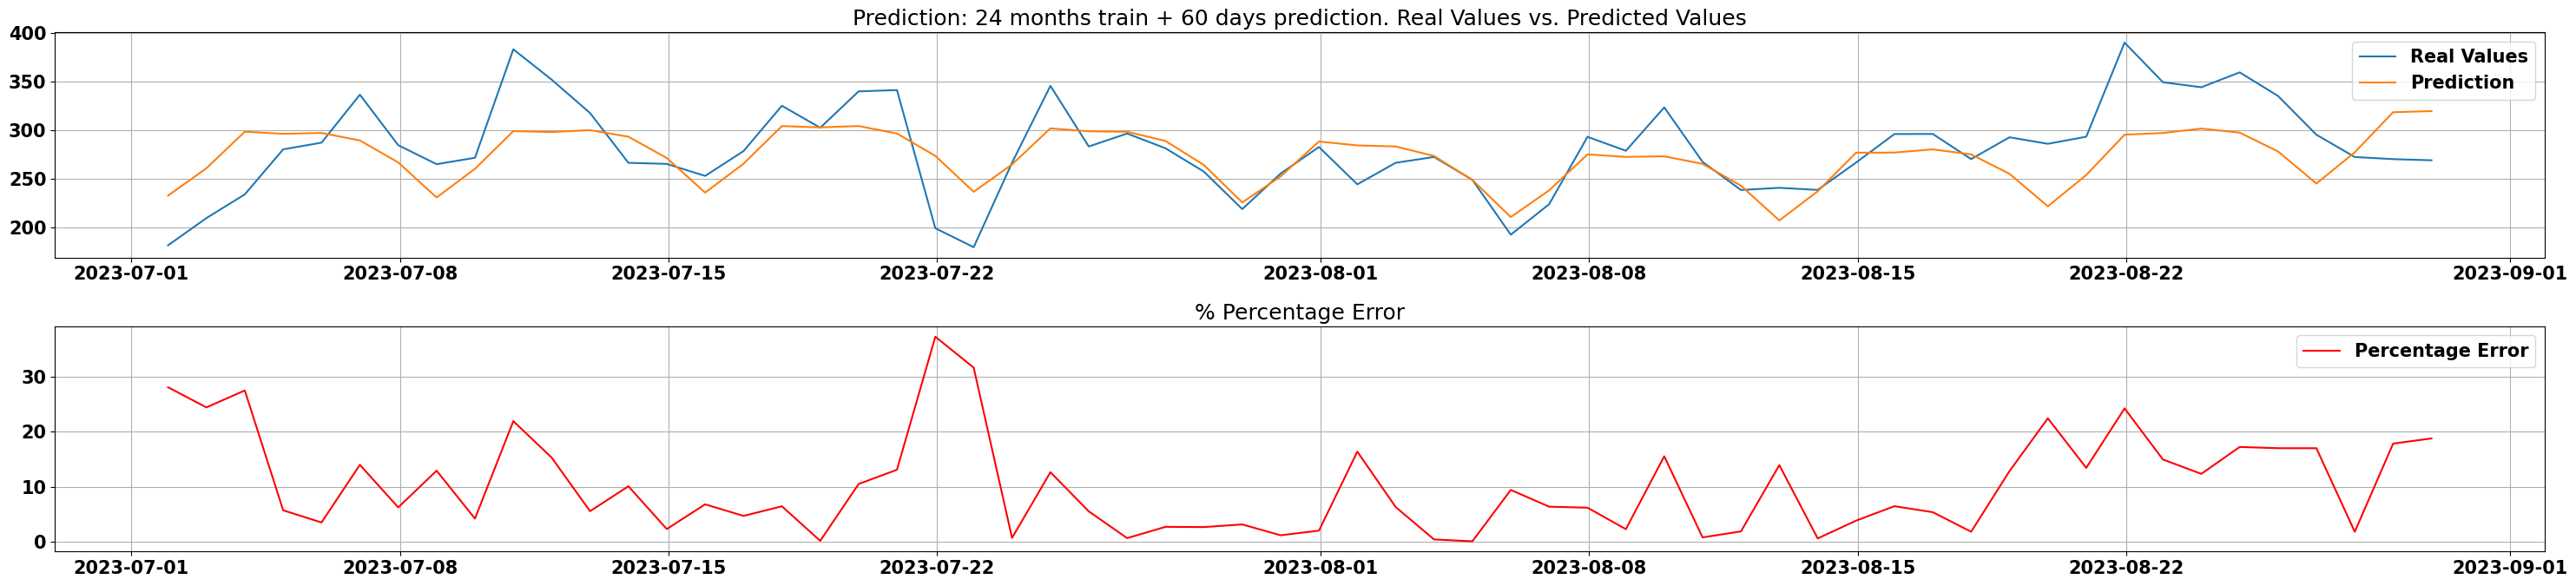

%error Real vs. Prophet Prediction: 10.17 


In [15]:
model = Prophet(yearly_seasonality = True, weekly_seasonality= True, daily_seasonality= True, changepoint_prior_scale = 0.001, seasonality_prior_scale = 10.0)
# Fit the model on historical data
model.fit(dataset_24m)

# making prediction:
future = model.make_future_dataframe(periods=60, freq='D')
forecast = model.predict(future)

# creating a combined dataset with all data to plot:
dataset_copy = dataset_CI[21864:]
forecast_copy = forecast[10223:]

forecast_copy.set_index('ds', inplace=True)
df_aligned = dataset_copy[dataset_copy.index.isin(forecast_copy.index)]
df_combined = df_aligned.join(forecast_copy, lsuffix='_hourly', rsuffix='_resampled')

# caclulating difference error (% abs):
df_combined['percerr_graph'] = (abs((df_combined['yhat']-df_combined['LCA'])/df_combined['LCA']))*100

# plotting:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 7))

ax1.plot(df_combined.index, df_combined['LCA'], label='Real Values')
ax1.plot(df_combined.index, df_combined['yhat'], label='Prediction')
ax1.set_title(f"Prediction: 24 months train + 60 days prediction. Real Values vs. Predicted Values")
ax1.grid()
ax1.legend()

ax2.plot(df_combined.index, df_combined['percerr_graph'], 'red', label = 'Percentage Error')
ax2.set_title(f"% Percentage Error")
ax2.grid()
ax2.legend()

plt.rc("font", weight="bold", size=15)
plt.tight_layout()
plt.show()

print(f"%error Real vs. Prophet Prediction: {100*mean_absolute_percentage_error(df_combined['LCA'], df_combined['yhat']):.2f} ")

We get the error of abs% 10.31, which is relatively good. Comparing it also with the naive last year value prediction (seasonal prediction: "the next value is the same as the last year value")

In [20]:
def seasonal_naive_pred(df):
    pred = []
    for i in range(1, len(df)):
        # timestamp of one year before the current timestamp, finding it inside the dataset:
        prev_year_timestamp = df.index[i - 1] - pd.DateOffset(weeks=1)
        
        if prev_year_timestamp not in df.index:
            pred.append(None)
        else:
            # Get the value from the same timestamp one year before
            pred.append(df.loc[prev_year_timestamp, 'LCA'])
    
    pred = [None] + pred
    return pred

18:45:28 - cmdstanpy - INFO - Chain [1] start processing
18:45:30 - cmdstanpy - INFO - Chain [1] done processing


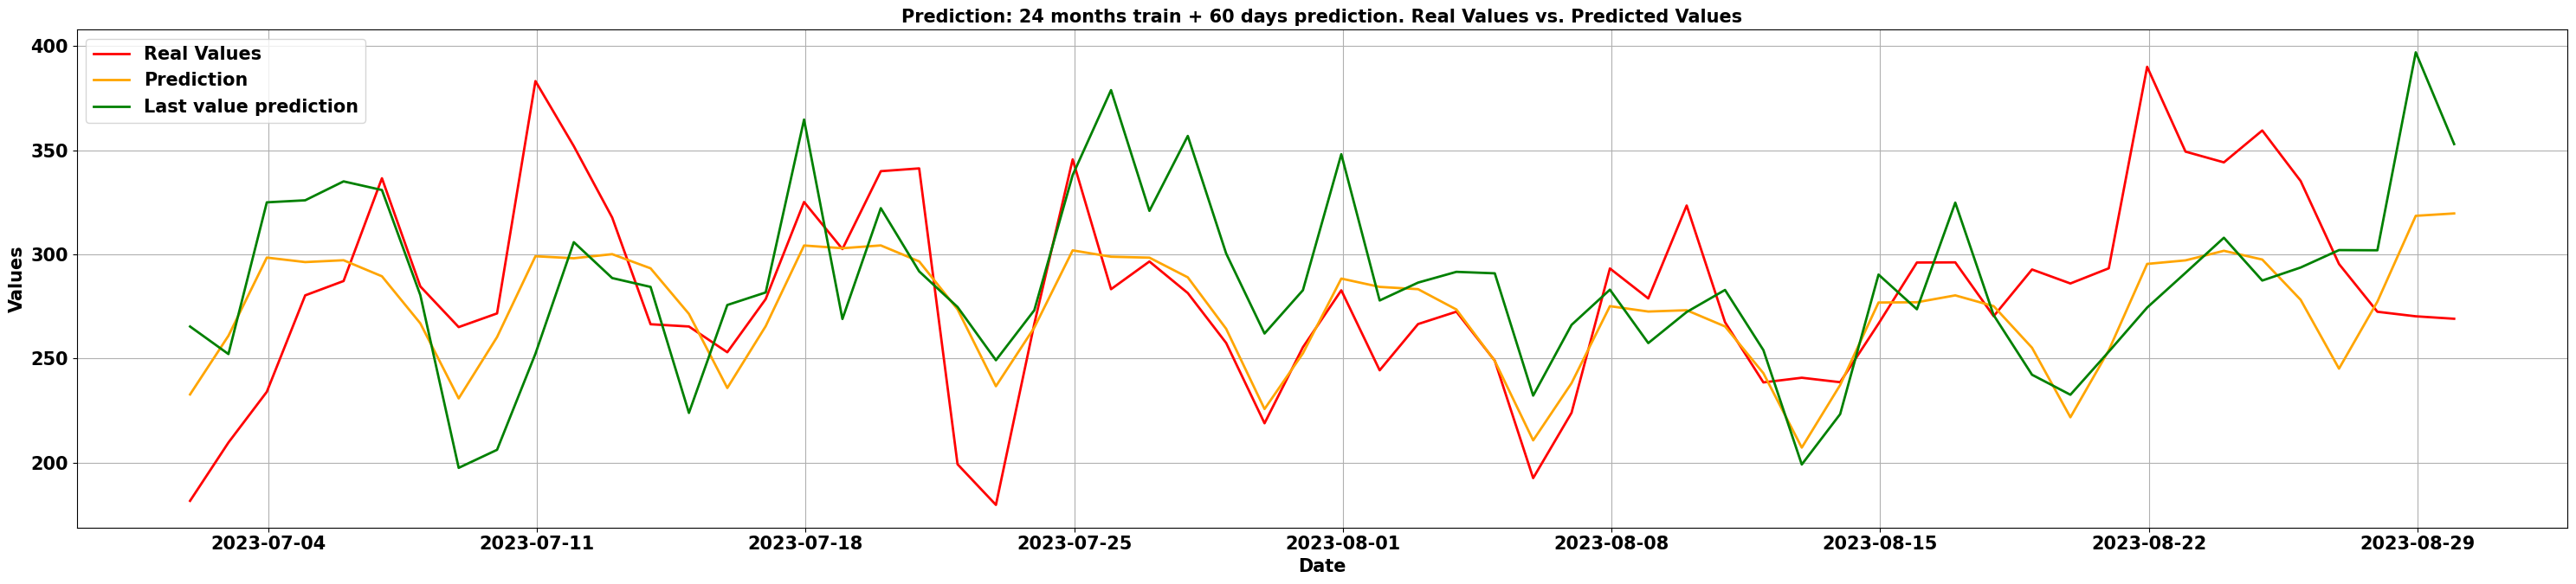

%abs error: Real Values vs. Prediction (Prophet): 10.17%
%abs error: Real Values vs. Seasonal Naive prediction 15.77%


In [21]:
import matplotlib.dates as mdates

model = Prophet(yearly_seasonality = True, weekly_seasonality=True, daily_seasonality=True, changepoint_prior_scale = 0.001, seasonality_prior_scale = 10.0)
# Fit the model on historical data
model.fit(dataset_24m)

future = model.make_future_dataframe(periods=60, freq='D')
forecast = model.predict(future)

dataset_CI['lastyrpred_naive'] = seasonal_naive_pred(dataset_CI)

dataset_copy = dataset_CI[21864:]
forecast_copy = forecast[10223:]

forecast_copy.set_index('ds', inplace=True)
df_aligned = dataset_copy[dataset_copy.index.isin(forecast_copy.index)]
df_combined = df_aligned.join(forecast_copy, lsuffix='_hourly', rsuffix='_resampled')

df_combined['percerr_graph'] = (abs((df_combined['yhat']-df_combined['LCA'])/df_combined['LCA']))*100

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 7))

# ax1.plot(df_combined.index, df_combined['LCA+direct'], label='Real Values')
# ax1.plot(df_combined.index, df_combined['yhat'], label='Prediction')
# ax1.plot(df_combined.index, df_combined['lastyrpred_naive'], label='Last Year Naive prediction')
# ax1.set_title(f"Prediction: 16 months train + 60 days prediction. Real Values vs. Predicted Values")
# ax1.grid()
# ax1.legend()

# ax2.plot(df_combined.index, df_combined['percerr_graph'], 'red', label = 'Percentage Error')
# ax2.set_title(f"% Percentage Error")
# ax2.grid()
# ax2.legend()

# fig, ax1 = plt.subplots(1, 1, figsize=(30, 7))

# plt.plot(df_combined.index, df_combined['LCA+direct'], label='Real Values', linewidth=2, color='red')
# plt.plot(df_combined.index, df_combined['yhat'], label='Prediction', linewidth=2, color='orange')
# plt.plot(df_combined.index, df_combined['lastyrpred_naive'], label='Last value prediction', linewidth=2, color='green')
# plt.title('Prediction: 16 months train + 60 days prediction. Real Values vs. Predicted Values', fontweight='bold', fontsize=15)   
# plt.grid()
# plt.legend()

# # ax2.plot(df_combined.index, df_combined['percerr_graph'], 'red', label = 'Percentage Error')
# # ax2.set_title(f"% Percentage Error")
# # ax2.grid()
# # ax2.legend()


# plt.rc("font", weight="bold", size=15)
# plt.tight_layout()
# plt.savefig('../PLOTS/CI_PRED.png', dpi=300)
# plt.show()

#===
# fig, ax1 = plt.subplots(figsize=(30, 7))

# ax1.plot(df_combined.index, df_combined['LCA+direct'], label='Real Values', linewidth=2, color='red')
# ax1.plot(df_combined.index, df_combined['yhat'], label='Prediction', linewidth=2, color='orange')
# ax1.plot(df_combined.index, df_combined['lastyrpred_naive'], label='Last value prediction', linewidth=2, color='green')

# ax1.set_title('Prediction: 16 months train + 60 days prediction. Real Values vs. Predicted Values', fontweight='bold', fontsize=15)
# ax1.set_xlabel('Date', fontweight='bold', fontsize=15)
# ax1.set_ylabel('Values', fontweight='bold', fontsize=15)
# ax1.grid()
# ax1.legend()

# # Optional: If you need to set the font globally
# plt.rc("font", weight="bold", size=10)

# # Adjust layout to ensure everything fits without overlap
# plt.tight_layout()

# # Save the figure
# plt.savefig('../PLOTS/CI_PRED.jpg', bbox_inches='tight', dpi=360)

# # Show the plot
# plt.show()
#===

# Create the plot
fig, ax1 = plt.subplots(figsize=(30, 7))

# Plot the data
ax1.plot(df_combined.index, df_combined['LCA'], label='Real Values', linewidth=2, color='red')
ax1.plot(df_combined.index, df_combined['yhat'], label='Prediction', linewidth=2, color='orange')
ax1.plot(df_combined.index, df_combined['lastyrpred_naive'], label='Last value prediction', linewidth=2, color='green')

# Set title and labels
ax1.set_title('Prediction: 24 months train + 60 days prediction. Real Values vs. Predicted Values', fontweight='bold', fontsize=15)
ax1.set_xlabel('Date', fontweight='bold', fontsize=15)
ax1.set_ylabel('Values', fontweight='bold', fontsize=15)

# Set major ticks locator and formatter for the x-axis
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Set locator to every week
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date labels

# Optional: Rotate date labels for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), ha='center')

# Enable grid
ax1.grid()

# Add legend
ax1.legend()

# Optional: If you need to set the font globally
plt.rc("font", weight="bold", size=15)

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Save the figure
plt.savefig('../PLOTS/CI_PRED.jpg', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

print(f"%abs error: Real Values vs. Prediction (Prophet): {100*mean_absolute_percentage_error(df_combined['LCA'], df_combined['yhat']):.2f}%")
print(f"%abs error: Real Values vs. Seasonal Naive prediction {100*mean_absolute_percentage_error(df_combined['LCA'], df_combined['lastyrpred_naive']):.2f}%")

As a result, it can be seen that better prediction is achieved compared to seasonal prediction based on last year value

c:\Users\Baibek\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Baibek\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
c:\Users\Baibek\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior,

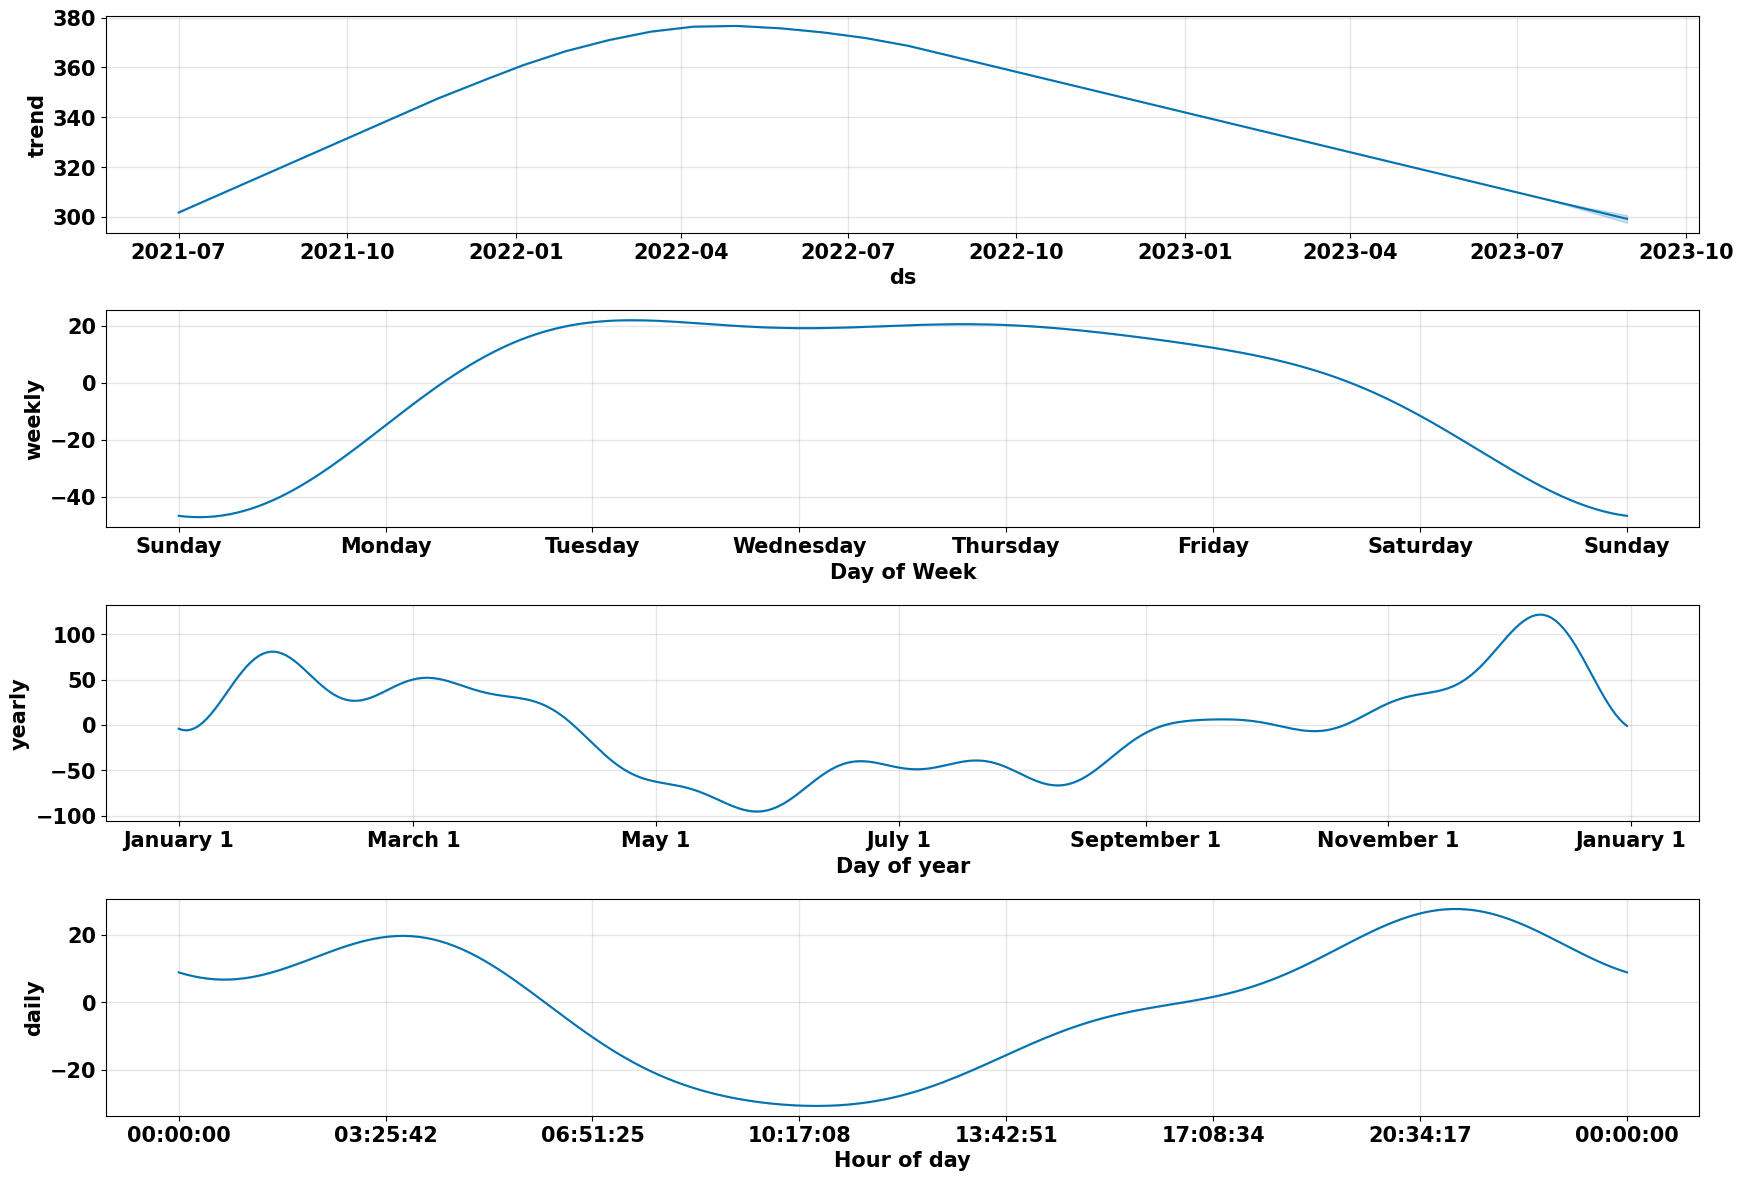

In [22]:
fig = model.plot_components(forecast)

# Set the figure size if needed
fig.set_size_inches(20, 12)  # width=10 inches, height=6 inches

# Iterate through each axis in the figure to set the labels
for ax in fig.get_axes():
    ax.set_xlabel(ax.get_xlabel(), fontweight='bold')
    ax.set_ylabel(ax.get_ylabel(), fontweight='bold')

# If you want to save the resized figure
fig.savefig('../PLOTS/CI_seasonality.jpg', bbox_inches='tight', dpi=300)

# Or just show the plot
plt.show()
